In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_train/255

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


## Building the Model
Here we define the model architecture

In [5]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

The above model could alternatively have been created as follows

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers

## Compiling the Model
Here we specify the loss function and the optimiser, as well as a set of extra metrics to compute during training and evaluation.

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['sparse_categorical_accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2195 - sparse_categorical_accuracy: 0.9209 - val_loss: 0.3283 - val_sparse_categorical_accuracy: 0.8814
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2170 - sparse_categorical_accuracy: 0.9223 - val_loss: 0.3175 - val_sparse_categorical_accuracy: 0.8896
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2124 - sparse_categorical_accuracy: 0.9241 - val_loss: 0.3117 - val_sparse_categorical_accuracy: 0.8892
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2103 - sparse_categorical_accuracy: 0.9254 - val_loss: 0.3097 - val_sparse_categorical_accuracy: 0.8914
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2065 - sparse_categorical_accuracy: 0.9255 - val_loss: 0.3059 - val_sparse_categorical_accuracy: 0.8908
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2020 - spars

<AxesSubplot:xlabel='Epoch'>

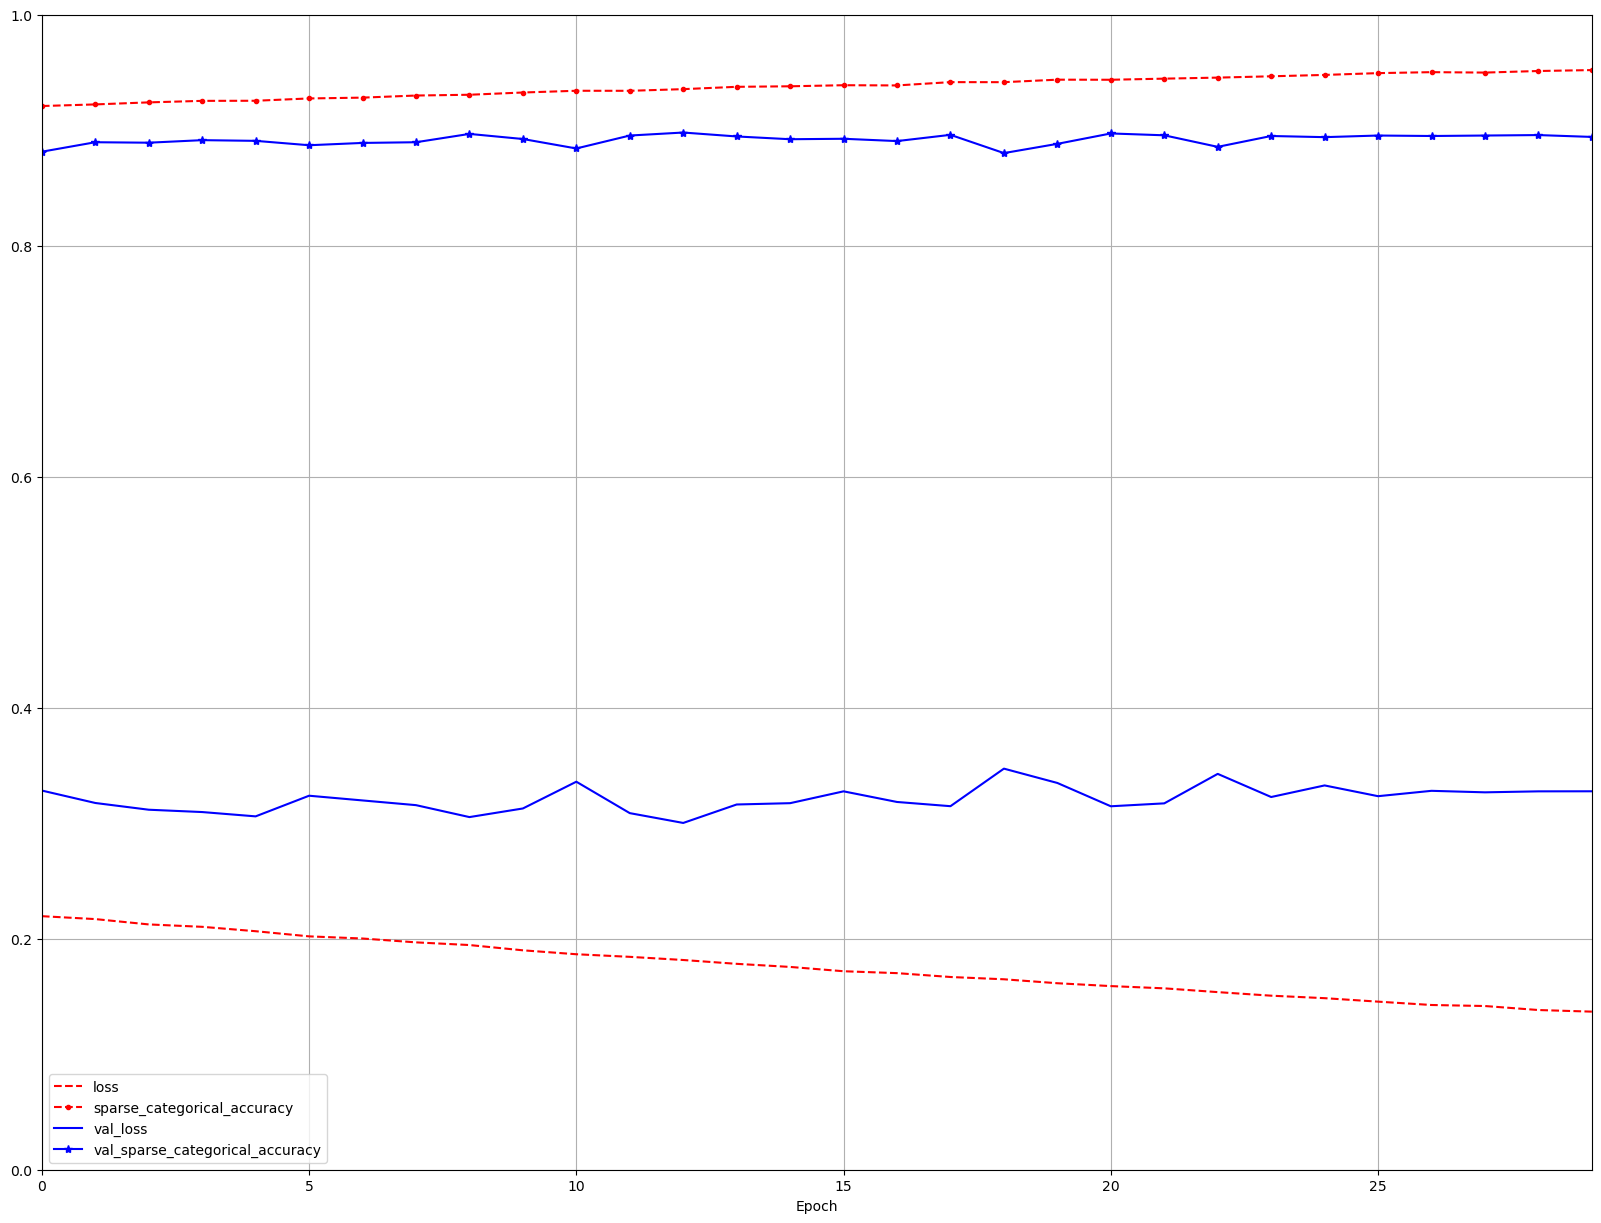

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(20,15), xlim=[0,29], ylim=[0,1], grid=True, xlabel='Epoch', style=['r--', 'r--.', 'b-', 'b-*'])

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 66ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.81, 0.  , 0.  , 0.1 , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
import numpy as np
y_pred = y_proba.argmax(axis=1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')

In [27]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [28]:
y_pred

array([9, 0, 0], dtype=int64)